# Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

# Import all the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
# load through url
url = "iris.csv"
#attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv(url)
#data.columns = attributes

In [5]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# types for the columns
data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [9]:
# numerical summary, only applies to numerical columns
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# number of instances in each class
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
# Take out a test set
train, test = train_test_split(data, test_size = 0.4, stratify = data['class'], random_state = 42)

In [12]:
# number of instances in each class in training data
train.groupby('class').size()

class
Iris-setosa        30
Iris-versicolor    30
Iris-virginica     30
dtype: int64

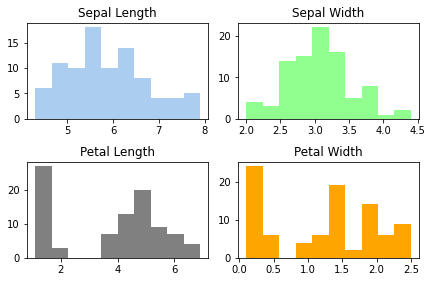

In [13]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal length'], bins = n_bins, color = "#ABCDEF");
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal width'], bins = n_bins, color = "#90FF8F");
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal length'], bins = n_bins, color = "grey");
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal width'], bins = n_bins, color = "orange");
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

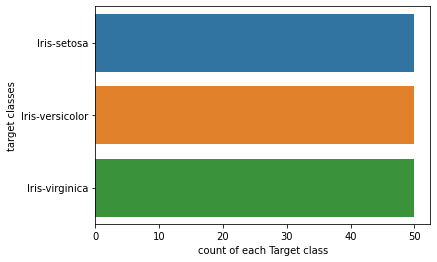

In [14]:
sns.countplot(y=data['class'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

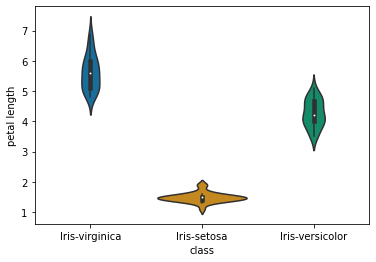

In [15]:
sns.violinplot(x="class", y="petal length", data= train, size= 5, palette = 'colorblind');

<AxesSubplot:>

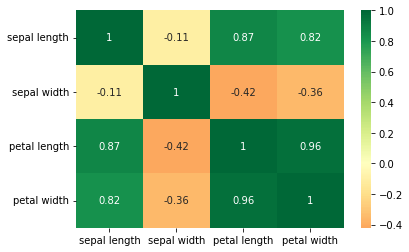

In [16]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',center=0)

In [17]:
data = data.sample(frac = 1)
data. head()

,sepal length,sepal width,petal length,petal width,class
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
92,5.8,2.6,4.0,1.2,Iris-versicolor
128,6.4,2.8,5.6,2.1,Iris-virginica


In [18]:
x = data.drop(['class'], axis =1)
y = data['class']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [20]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [21]:
reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
reg.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [22]:
y_pred = reg.predict(x_test)
y_proba = reg.predict_proba(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [23]:
score_lr= reg.score(x_test,y_test)
print(score_lr)

0.8444444444444444


In [24]:
from sklearn.metrics import confusion_matrix
actual=y_test
predicted=y_pred
results=confusion_matrix(actual,predicted)
print('confusion matrix')
print(results)

confusion matrix
[[17  0  0]
 [ 0 11  7]
 [ 0  0 10]]


In [25]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
from sklearn.metrics import accuracy_score
print ("Train - Accuracy :", accuracy_score(y_train, clf.predict(x_train)))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.
predict(x_train)))

Train - Accuracy : 0.9714285714285714
Train - Confusion matrix :
 [[33  0  0]
 [ 0 30  2]
 [ 0  1 39]]
